In [1]:
# importing all the required libraries for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 1 : Data sourcing 
## In this section we will load the data from csv file to the pandas dataframe

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## High level summary of data
* There are total 111 columns in the data
* There are total 39717 records present in the data

# Step 2 : Data cleaning
## In this section we will remove duplicates, finding missing values and imputing with correct values and find outliers

In [4]:
#First let's try to find out of if there is any duplicate rows for the same member
df['member_id'].value_counts().sum()
# sum of unique member_id is matching with the total number of rows so there is no duplicate data for the same member

39717

In [5]:
#First let's find out the columns which are having only null values
drop_cols = df.isna().sum().sort_values(ascending=False)

In [6]:
drop_cols = list((drop_cols[drop_cols == 39717]).index)

In [7]:
#verifying once again before dropping these 53 columns
df[drop_cols].columns

Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
       'mths_since_rec

In [8]:
# storing the data after dropping the columns into a new dataframe df_set1 so that in case if previous data to be restored it is available in df
df_set1 = df.drop(labels= drop_cols,axis = 1)  # this will drop 54 columns from the dataset and will be kept in df_set1

In [10]:
df_set1.info()  # with this cleanup now the total no of columns left is 57

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
# From the above information we can see that there are 3 more columns which we can further analyze for cleanup
# since they have very few values
# next_pymnt_d , mths_since_last_record and mths_since_last_delinq
# since these columns have very few values available they can be dropped

drop_cols = ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq']
df_set1.drop(labels= drop_cols,axis = 1 ,inplace= True)

In [13]:
df_set1.info()
# now we have 54 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
# we don't need id and member_id for the analysis hence it can be dropped
df_set1.drop(labels = ['id','member_id'], axis = 1, inplace=True)

In [15]:
# let's check the columns which have null values
df_set1.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                     

In [16]:
# let's try to find out values in emp_title column
df_set1.emp_title.value_counts()

# emp_title mostly contains value of employer name for records created after 9/23/2013 hence it doesn't give much value to dataset hence it can be dropped
df_set1.drop('emp_title', inplace= True , axis = 1)

In [17]:
def fetchNumber(str_val):
    num = int(''.join([letter for letter in str_val if letter.isdigit()])) if isinstance(str_val,str) else str_val
    return num

In [18]:
# now let's analyze the emp_length column
df_set1['emp_length']

# let's do 2 things here on emp_length column
# 1. fill all the na values with zero
# 2. strip out everything other than numeric value



df_set1['emp_length'].fillna(0,inplace=True)
df_set1['emp_length'] = df_set1['emp_length'].apply(lambda x :  fetchNumber(x))

In [19]:
# value counts after fixing the emp_length column
df_set1['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [20]:
# removing desc column
df_set1.drop('desc', inplace= True , axis = 1)

In [21]:
# removing url column as it doesn't give any value
df_set1.drop('url', inplace= True , axis = 1)

In [22]:
#Fixing the term column by removings months string and making column an integer
df_set1.term = df_set1.term.apply(lambda x : fetchNumber(x))

In [23]:
# Removing % sign from interest rate column
df_set1.int_rate = df_set1.int_rate.apply(lambda x : float(x[:-1]))

In [24]:
# converting annual income to int value 
df_set1.annual_inc = df_set1.annual_inc.astype(int)

In [25]:
# payment plan has single value n for all the columns hence it can be dropped
df_set1.drop('pymnt_plan', inplace= True , axis = 1)

In [26]:
# zip_code column doesn't give much details for analysis hence it can be dropped
df_set1.drop('zip_code', inplace= True , axis = 1)

In [27]:
# Removing % sign from revol_util column
df_set1.revol_util = df_set1.revol_util.apply(lambda x : x if isinstance(x,float) else float(x[:-1]))

In [28]:
#initial_list_status column has only single value
df_set1.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [29]:
#hence dropping initial_list_status column
df_set1.drop('initial_list_status', inplace= True , axis = 1)

In [30]:
#collections_12_mths_ex_med column has only single value
df_set1.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [31]:
#hence dropping collections_12_mths_ex_med column
df_set1.drop('collections_12_mths_ex_med', inplace= True , axis = 1)

In [32]:
#policy_code column has only single value
df_set1.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [33]:
#hence dropping policy_code column
df_set1.drop('policy_code', inplace= True , axis = 1)

In [34]:
#application_type column has only single value
df_set1.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [35]:
#hence dropping application_type column
df_set1.drop('application_type', inplace= True , axis = 1)

In [36]:
#acc_now_delinq column has only single value
df_set1.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [37]:
#hence dropping acc_now_delinq column
df_set1.drop('acc_now_delinq', inplace= True , axis = 1)

In [38]:
#chargeoff_within_12_mths column has only single value
df_set1.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [39]:
#hence dropping chargeoff_within_12_mths column
df_set1.drop('chargeoff_within_12_mths', inplace= True , axis = 1)

In [40]:
#delinq_amnt column has only single value
df_set1.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [41]:
#hence dropping delinq_amnt column
df_set1.drop('delinq_amnt', inplace= True , axis = 1)

In [42]:
#tax_liens column has only single value
df_set1.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [43]:
#hence dropping tax_liens column
df_set1.drop('tax_liens', inplace= True , axis = 1)

In [327]:
#hence dropping title column
df_set1.drop('title', inplace= True , axis = 1)

In [354]:
#hence dropping title column
df_set1.drop('delinq_2yrs', inplace= True , axis = 1)

In [426]:
#hence dropping pub_rec_bankruptcies column
df_set1.drop('pub_rec_bankruptcies', inplace= True , axis = 1)

### There are some columns which are post approvals since we are analyzing the factors which are important in loan approval hence we can remove the post approvals columns

#### Post approval columns
* revol_bal
* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int
* last_pymnt_d
* last_pymnt_amnt
* last_credit_pull_d



In [161]:
post_approval_cols = ['revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
df_set1.drop(columns=post_approval_cols, inplace= True , axis = 1)

### Now we will start filling missing values in the remaining columns

In [44]:
# The columns which have null values
df_set1.isna().sum()[df_set1.isna().sum() > 0]

title                    11
revol_util               50
last_pymnt_d             71
last_credit_pull_d        2
pub_rec_bankruptcies    697
dtype: int64

In [45]:
# filling title value as 'Unknown' for missing values
df_set1.title.fillna('Unknown',inplace=True)

In [46]:
# columns which have missing values
df_set1.isna().sum()[df_set1.isna().sum() > 0]

revol_util               50
last_pymnt_d             71
last_credit_pull_d        2
pub_rec_bankruptcies    697
dtype: int64

In [47]:
# mean of revol_util
print(f'Mean value of revol_util {np.round(df_set1.revol_util.value_counts().mean(),2)}')
# filling missing values for revol_util with the mean value
df_set1.revol_util.fillna(36.43, inplace=True)

# Not sure what value can be filled for this hence will just set keep this missing values for  last_pymnt_d
# for pub_rec_bankruptcies there are 697 records where value is missing hence keeping missing values in this column
# to avoid any discrepency


Mean value of revol_util 36.43


In [48]:
# there are just 2 records for which last_credit_pull_d is na
# For many records last_pymnt_d and last_credit_pull_d is same hence we can keep last_pymnt_d as last_credit_pull_d for these 2 records

df_set1.last_credit_pull_d.fillna(df_set1.last_pymnt_d, inplace=True)
# null columns after this fix
df_set1.isna().sum()[df_set1.isna().sum() > 0]

last_pymnt_d             71
pub_rec_bankruptcies    697
dtype: int64

In [50]:
# Rounding off the decimal values for the following columns to integer values for better analysis
round_off_cols = ['funded_amnt_inv','installment','int_rate','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                 'last_pymnt_amnt','dti','revol_util']
df_set1[round_off_cols] = np.round(df_set1[round_off_cols]).astype(int)


# Step 3 Univariate analysis

### analyzing loan_amnt column

In [51]:
# using decribe to see basic mean and percentiles
df_set1.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

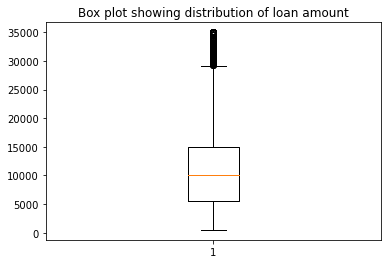

In [52]:
plt.boxplot(df_set1.loan_amnt)
plt.title('Box plot showing distribution of loan amount')
plt.show()

### analyzing installment column

<AxesSubplot:xlabel='installment'>

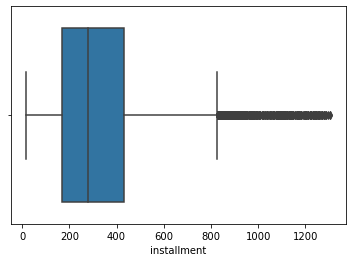

In [53]:
df_set1.installment.value_counts().sort_index()
sns.boxplot(df_set1.installment)

#### There are many outliers present in the installment data, we will further analyze other columns to see if outliers are continous then we will remove them

<AxesSubplot:xlabel='annual_inc'>

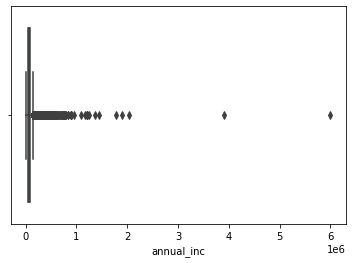

In [54]:
sns.boxplot(df_set1.annual_inc)

Annual income is showing a large number of outliers , we will try to clean this up

In [55]:
df_set1.annual_inc.describe()

count    3.971700e+04
mean     6.896892e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [56]:
# let's find out the 90th and 95th percentile
print(f'95th percentile for annual income {df_set1.annual_inc.quantile(.95)}')
print(f'99th percentile for annual income {df_set1.annual_inc.quantile(.99)}')
print(f'difference between 99th and 95th percentile {df_set1.annual_inc.quantile(.99) - df_set1.annual_inc.quantile(.95)}')
print(f'difference between 99th and max {df_set1.annual_inc.max() - df_set1.annual_inc.quantile(.99)}')

95th percentile for annual income 142000.0
99th percentile for annual income 234999.36
difference between 99th and 95th percentile 92999.35999999999
difference between 99th and max 5765000.64


> The difference between 99th and 100th percentile is very huge hence we can drop the records which are higher than 99th percentile value

In [57]:
df_set1 = df_set1[df_set1.annual_inc < df_set1.annual_inc.quantile(.99)]

<AxesSubplot:xlabel='annual_inc'>

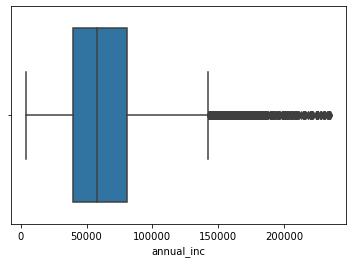

In [58]:
# now let's plot the annual inc
sns.boxplot(df_set1.annual_inc)

In [59]:
df_set1.annual_inc.describe()

count     39319.000000
mean      65524.209237
std       35215.886563
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [60]:
print(f'mean of revol_bal {df_set1.revol_bal.median()}')
print(f'the difference between 97th and 100th percentile {df_set1.revol_bal.quantile(1) - df_set1.revol_bal.quantile(.97)}')



mean of revol_bal 8802.0
the difference between 97th and 100th percentile 98098.54000000001


<AxesSubplot:xlabel='revol_bal'>

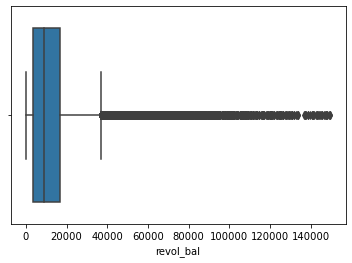

In [61]:
sns.boxplot(df_set1.revol_bal)

The last 3 percentile of revol_bal is approx 12 times of mean hence we can drop these last 3% records for better understanding of data

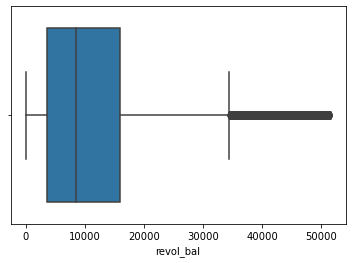

In [62]:
df_set1 = df_set1[df_set1.revol_bal < df_set1.revol_bal.quantile(.97) ]

#plot the revol_bal on box plot to see the difference after removing such records
sns.boxplot(df_set1.revol_bal)
plt.show()

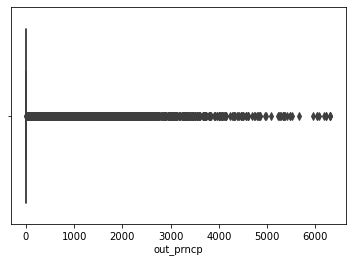

In [63]:
# box plot of out_prncp
sns.boxplot(df_set1.out_prncp)
plt.show()

In [64]:
print(f'only {np.round(df_set1[df_set1.out_prncp > 0].shape[0]*100/df_set1.shape[0],2)}% of records have values in out_prncp column')
# But we should not drop these values as they could be deriving factors to calculate loan status

only 2.86% of records have values in out_prncp column


total_rec_late_fee , recoveries and collection_recovery_fee columns are not adding any values in the analysis hence they can be dropped

In [65]:
df_set1.drop(['total_rec_late_fee','recoveries','collection_recovery_fee'],inplace=True,axis = 1)

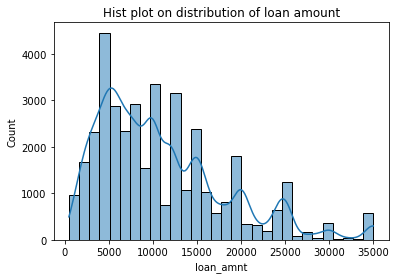

In [66]:
# let's create the distribution plot of loan_amnt column
sns.histplot(df_set1.loan_amnt,kde = True, bins = 30)
plt.title('Hist plot on distribution of loan amount')
plt.show()


### Observation
1. Most of the people borrow loan lesser than 15000
2. Maximum number of people taken loan of amount 5000

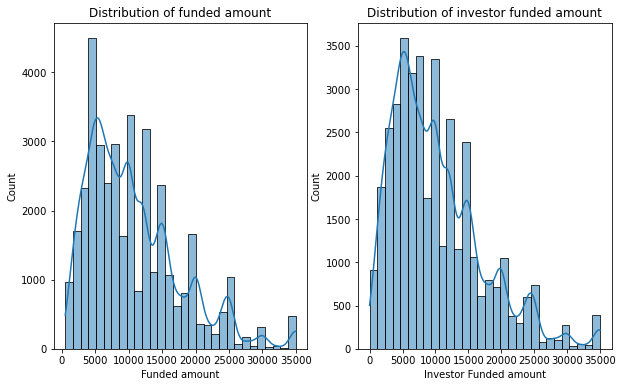

In [67]:
# let's create the distribution plot of loan_amnt column
fig = plt.figure(figsize=(10,6))

# ax = fig.add_subplot(1,2,1)
# sns.histplot(df_set1.loan_amnt,kde = True, bins = 30)
# ax.set_title('Distribution of loan amount')
# plt.xlabel('Loan amount')

ax = fig.add_subplot(1,2,1)
sns.histplot(df_set1.funded_amnt,kde = True, bins = 30)
ax.set_title('Distribution of funded amount')
plt.xlabel('Funded amount')

ax = fig.add_subplot(1,2,2)
sns.histplot(df_set1.funded_amnt_inv,kde = True, bins = 30)
ax.set_title('Distribution of investor funded amount')
plt.xlabel('Investor Funded amount')

plt.show()

In [158]:
df_set1.drop(['funded_amnt'],inplace=True,axis = 1)

### Observation 
1. There is not much difference between the ditribution of funded amount and investor funded amount.
2. We can drop funded_amnt column as we would get information required from funded_amnt_inv column

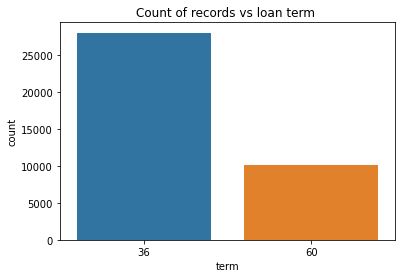

In [68]:
sns.countplot(df_set1.term)
plt.title('Count of records vs loan term ')
plt.show()

In [69]:
print(f'percentage of records term as 36 months {np.round(df_set1.term.value_counts()*100/len(df_set1),2)[36]}%')
print(f'percentage of records term as 60 months {np.round(df_set1.term.value_counts()*100/len(df_set1),2)[60]}%')

percentage of records term as 36 months 73.38%
percentage of records term as 60 months 26.62%


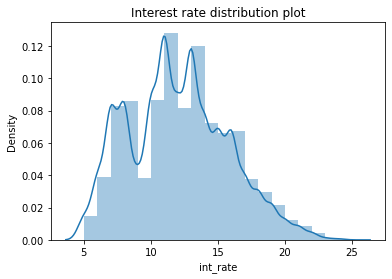

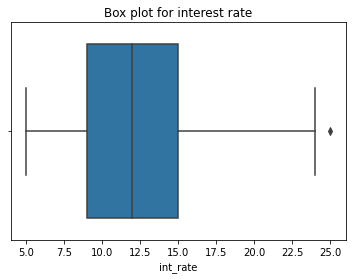

In [70]:
sns.distplot(df_set1.int_rate,bins =20)
plt.title('Interest rate distribution plot')
plt.show()
sns.boxplot(df_set1.int_rate)
plt.title('Box plot for interest rate')
plt.show()

### Observation

1. int_rate could be a very important feature in the analysis , from above plots it looks like there are not much outliers present in the dataset
2. Most of the record has interest rate between 10-15%

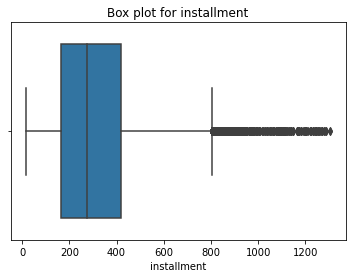

In [71]:
sns.boxplot(df_set1.installment)
plt.title('Box plot for installment')
plt.show()

In [73]:
print(df_set1.installment.quantile(.98))
print(df_set1.installment.max())

857.0
1305


In [74]:
df_set1 = df_set1[df_set1.installment <= df_set1.installment.quantile(.98)]

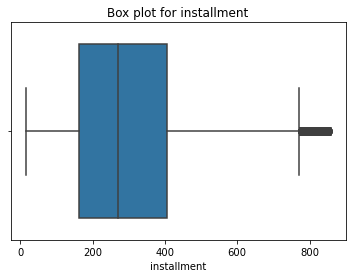

In [75]:
sns.boxplot(df_set1.installment)
plt.title('Box plot for installment')
plt.show()

### Observation
1. In the box plot draws for installment it can be seen that there are alot of outliers in the data
2. We found out that difference between last 2 percentile data for installment is very high approx 500 which is way greater than the median value hence we dropped these records from the dataset
3. Box plot plotted after removing last 2 percentile records looking better than the previous one

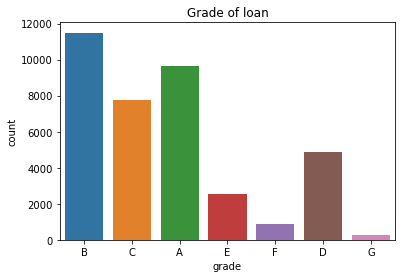

In [76]:
# plotting count plot of the grade and subgrade columns
sns.countplot(df_set1.grade)
plt.title('Grade of loan')
plt.show()

In [77]:
np.round(len(df_set1[df_set1.grade.isin(['A','B','C'])])*100/len(df_set1))

77.0

### Observation
1. Grades A,B and C are the largest type of grades where loan was given 
2. 77% percent of the loan is graded as A,B or C

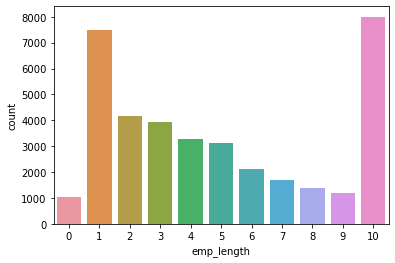

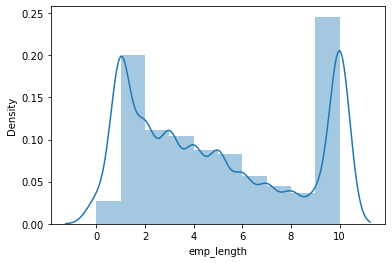

In [78]:
sns.countplot(df_set1.emp_length)
plt.show()
sns.distplot(df_set1.emp_length,bins = 10)
plt.show()

### Observation
1. From above plots we can see that employees with employment length 1 and 10 years experience are the largest receiver of the loans in the given dataset
2. Spike can be seen at 1 year or 10 years which means most of the people get loan or either at entry level or the senior most employees

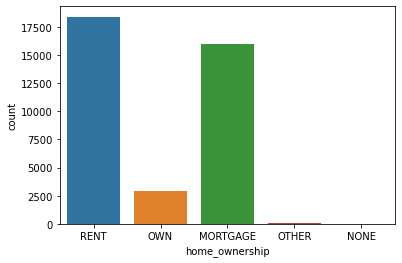

In [79]:
# This plot shows the frequency of home_membership in the data given
# Most of the borrowers have either rented the home or paying mortgage for the home
sns.countplot(df_set1.home_ownership)
plt.show()

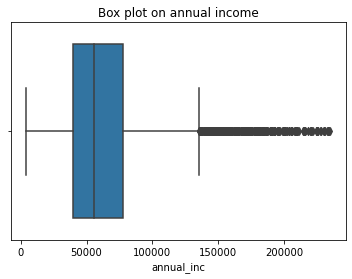

In [80]:
df_set1.annual_inc.value_counts()
sns.boxplot(df_set1.annual_inc)
plt.title('Box plot on annual income')
plt.show()

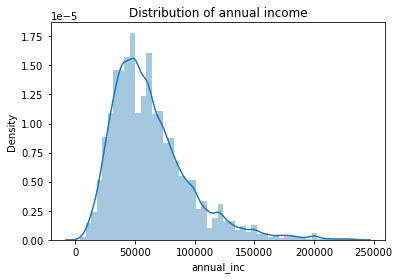

In [81]:
sns.distplot(df_set1.annual_inc)
plt.title('Distribution of annual income')
plt.show()

In [82]:
print(f'95th percentile of annual income {df_set1.annual_inc.quantile(.98)}')
print(f'Max anual income {df_set1.annual_inc.max()}')
print(f'No of records falling in last 2 percentile of annual income {df_set1[df_set1.annual_inc > df_set1.annual_inc.quantile(.98)].shape[0]}')

df_set1 = df_set1[df_set1.annual_inc <= df_set1.annual_inc.quantile(.98)]

95th percentile of annual income 155000.0
Max anual income 234996
No of records falling in last 2 percentile of annual income 745


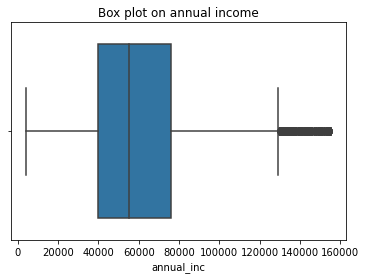

In [83]:
df_set1.annual_inc.value_counts()
sns.boxplot(df_set1.annual_inc)
plt.title('Box plot on annual income')
plt.show()

### Observation
1. Annual income could be an important variable to analyze further
2. By anaylyzing box plot and hist plot on annual income it has been observed that there are plenty of outliers in the date.
3. We found out that the difference between last 2 percentile of data is approx 85k which is causing the distribution being tailed at the end
4. We removed these last 2 percentile of rows which were 745 rows and then plotted box plot again. The difference between box plots is clearly visible before and after removing the outliers.

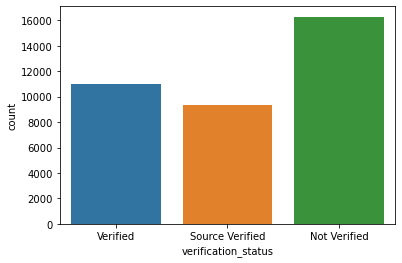

In [84]:
# creating count plot on verification status
sns.countplot(df_set1.verification_status)
plt.show()

# Count of Not verified records are greater than Verified and Source verified

In [104]:
df_set1['issue_d_mon'] = df_set1.issue_d.apply(lambda x : x[:3])
df_set1['issue_d_year'] = df_set1.issue_d.apply(lambda x : x[-2:])

#### Extracted the month and year from issue_d column and saved it into new column for future analysis

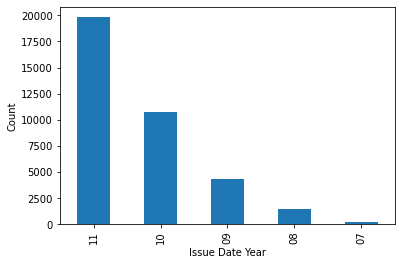

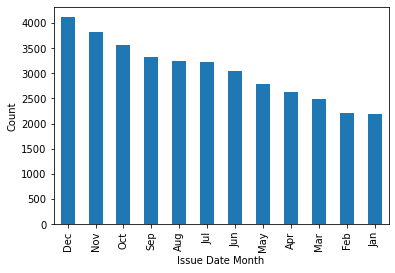

In [119]:
df_set1.issue_d_year.value_counts().plot.bar()
plt.xlabel('Issue Date Year')
plt.ylabel('Count')
plt.show()
df_set1.issue_d_mon.value_counts().plot.bar()
plt.xlabel('Issue Date Month')
plt.ylabel('Count')
plt.show()

1. No of loans issued are increasing every year from 2007 to 2011. Maximum loans were distributed in 2011
2. Maximum no of loans were distributed in the month of Dec

# Bivariate analysis

<AxesSubplot:xlabel='loan_amnt'>

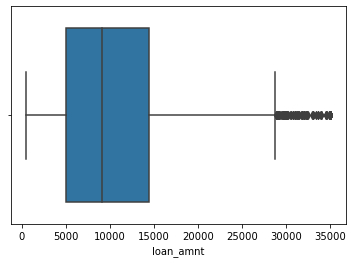

In [129]:
sns.boxplot(df_set1.loan_amnt)
plt.show()

In [135]:
print(f'Last 5 percentile of loan amount {df_set1.loan_amnt.quantile(1) - df_set1.loan_amnt.quantile(.95)}')

Last 5 percentile of loan amount 10750.0


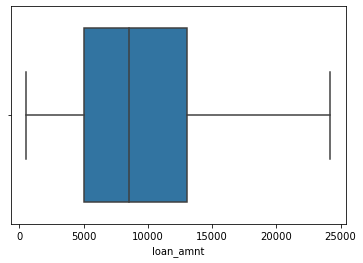

In [137]:
df_set1 = df_set1[df_set1.loan_amnt < df_set1.loan_amnt.quantile(.95)]
sns.boxplot(df_set1.loan_amnt)
plt.show()

1. Removed last 5 percentile records mostly causing the outliers in loan amount
2. Plotted the box plot after removing and it looks very clean

### Creating bins for loan_amount and will compare with charged_off records

In [146]:
df_set1['loan_amnt_category'] = pd.cut(df_set1.loan_amnt, bins = 5, precision= 0, labels= ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k'] )

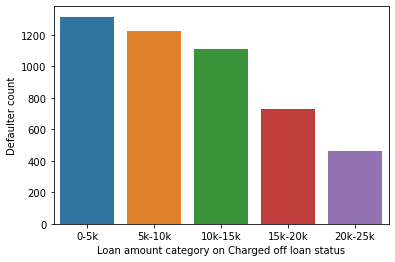

In [186]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'loan_amnt_category')
plt.xlabel('Loan amount category on Charged off loan status')
plt.ylabel('Defaulter count')
plt.show()

### Creating bins for funded_amnt_inv and will compare on charged_off records

In [168]:
df_set1['fundec_amnt_inv_category'] = pd.cut(df_set1.funded_amnt_inv, bins = 5, precision= 0, labels= ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k'] )

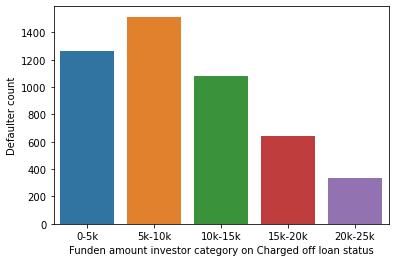

In [188]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'fundec_amnt_inv_category')
plt.xlabel('Funden amount investor category on Charged off loan status')
plt.ylabel('Defaulter count')
plt.show()

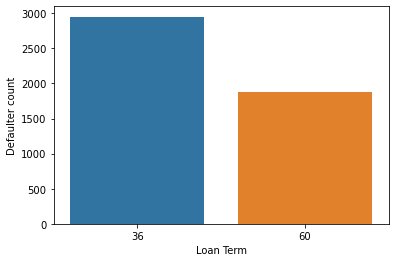

In [190]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'term')
plt.xlabel('Loan Term')
plt.ylabel('Defaulter count')
plt.show()

### Creating bins for interest rate and will compare on charged_off records

### Creating bins for interest rate and will compare on charged_off records

In [177]:
df_set1['int_rate_category'] = pd.cut(df_set1.int_rate, bins = 8, precision= 0, labels= ['5-7.5','7.5-10','10-12.5','12.5-15','15-17.5','17.5-20','20-22.5','>22.5'] )

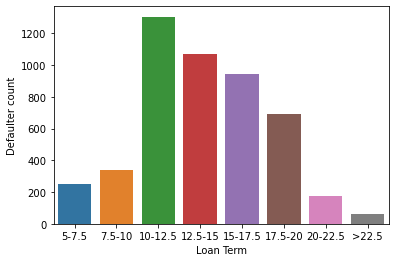

In [207]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'int_rate_category')
plt.xlabel('Loan Term')
plt.ylabel('Defaulter count')
plt.show()


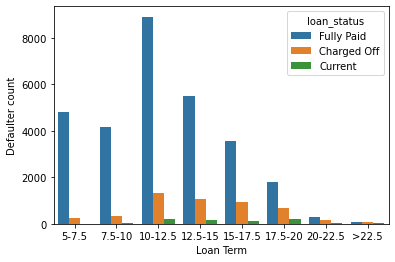

In [209]:
sns.countplot(data = df_set1, x = 'int_rate_category',hue= 'loan_status')
plt.xlabel('Loan Term')
plt.ylabel('Defaulter count')
plt.show()

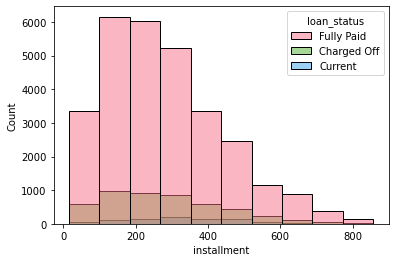

In [255]:
sns.histplot(data = df_set1,x= 'installment',bins = 10,hue = 'loan_status', palette='husl')
plt.show()

### Analyzing grade and subgrades

<AxesSubplot:xlabel='grade', ylabel='count'>

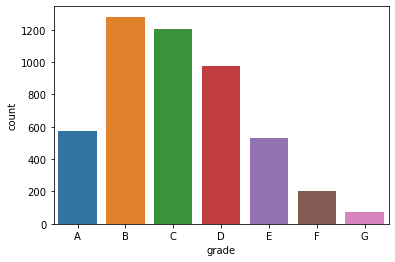

In [262]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'] , x = 'grade', order = ['A','B','C','D','E','F','G'])

In [277]:
df_set1['sub_grade_num'] = df_set1.sub_grade.apply(lambda x : int(x[-1]))

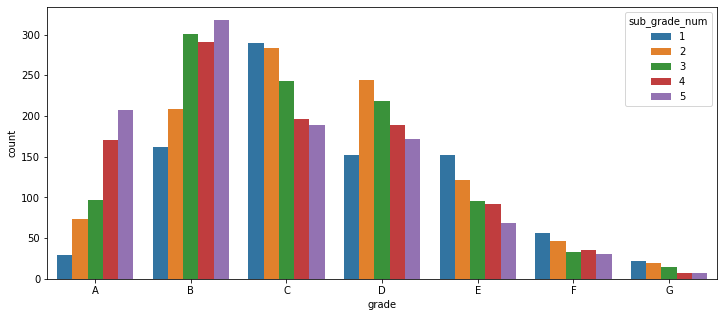

In [281]:
fig = plt.figure(figsize = (12,5))
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'] , x = 'grade', order = ['A','B','C','D','E','F','G'], hue = 'sub_grade_num', hue_order=[1,2,3,4,5])
plt.show()

1. Maximum number of defaulters belong to Grade A, B and C
2. For Grade B sub grade 1 and 2 are lower defaulters but for Grade C sub grade 1 and 2 are having larger number of defaulters.
3. Sub grade 2 is having major defaulters in almost every category except Grade A and B

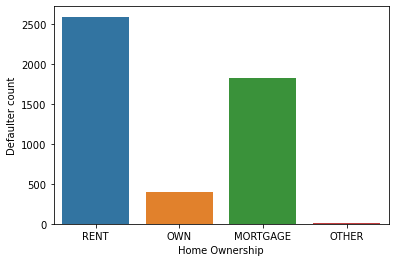

In [294]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Defaulter count')
plt.show()

1. People who own the home are lesser in terms of defaulters
2. Pepple who have home on rent or on mortgage have higher chances being defaulter

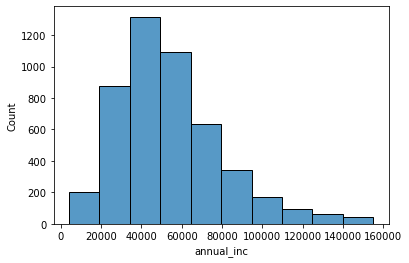

In [298]:
sns.histplot(data = df_set1[df_set1.loan_status == 'Charged Off'],x= 'annual_inc',bins = 10, palette='husl')
plt.show()

1. People with lower income (20k to 70k) are higher number of defaulters compare to higher income people

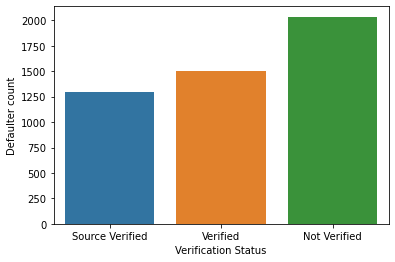

In [302]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'verification_status')
plt.xlabel('Verification Status')
plt.ylabel('Defaulter count')
plt.show()

1. Unverified loans have higher chances of being defaulter

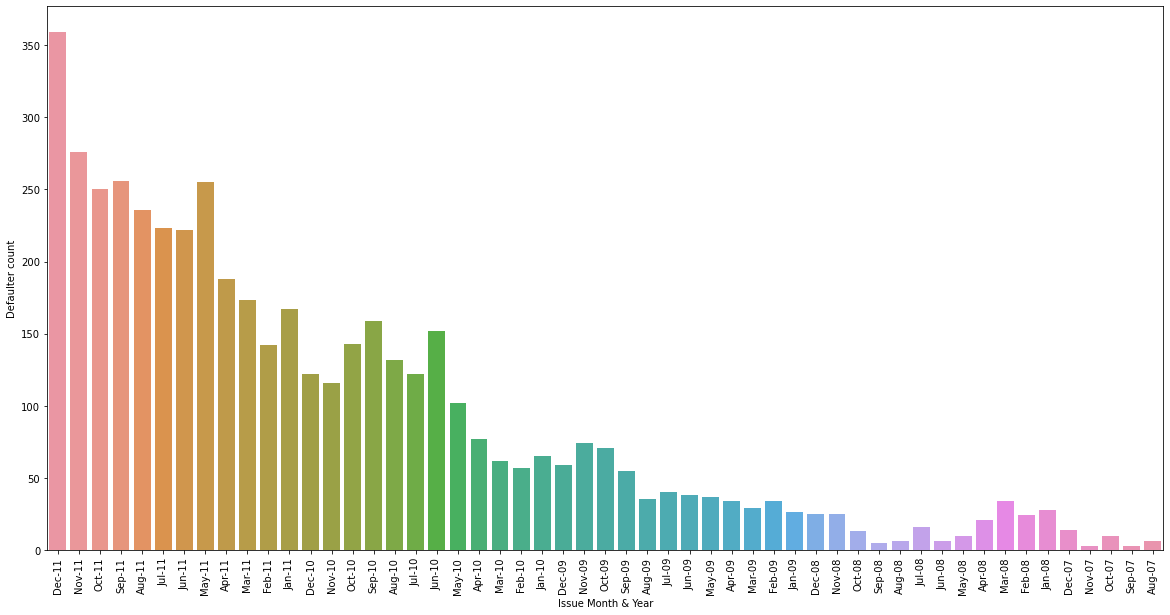

In [317]:
fig = plt.figure(figsize = (20,10))
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'issue_d')
plt.xlabel('Issue Month & Year')
plt.ylabel('Defaulter count')
plt.xticks(rotation = 90)
plt.show()

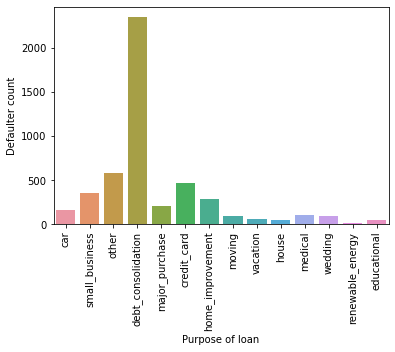

In [322]:
# fig = plt.figure(figsize = (20,10))

sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'purpose')
plt.xlabel('Purpose of loan')
plt.ylabel('Defaulter count')
plt.xticks(rotation = 90)
plt.show()

Most of the people take loan for debt consolidation and it's the major contributor for defaulters

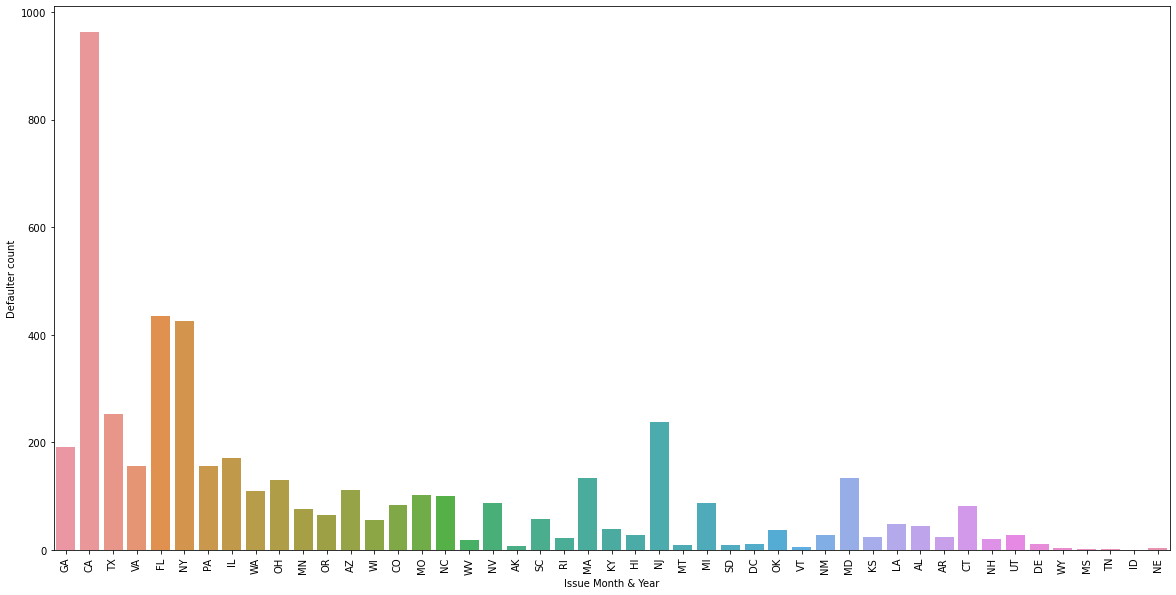

In [336]:
fig = plt.figure(figsize = (20,10))
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'addr_state')
plt.xlabel('Issue Month & Year')
plt.ylabel('Defaulter count')
plt.xticks(rotation = 90)
plt.show()

CA , FL and NY are the top 3 state for defaulters

<AxesSubplot:xlabel='dti', ylabel='Count'>

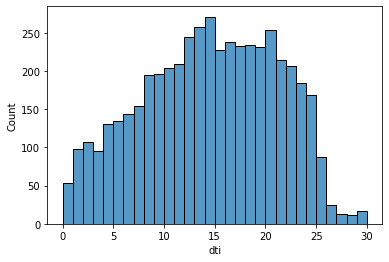

In [348]:
df_set1.dti.value_counts()
sns.histplot(df_set1[df_set1.loan_status == 'Charged Off']['dti'],bins = 30)

People having dti value between 13 to 25 have more chances of being defaulter

In [371]:
df_set1['earl_crline_year'] = df_set1.earliest_cr_line.apply(lambda x : int('19'+x[-2:]) if int(x[-2:]) > 20 else int('20'+x[-2:]))
df_set1.drop(columns = ['earliest_cr_line'], axis = 1 , inplace=True)

AttributeError: 'DataFrame' object has no attribute 'earliest_cr_line'

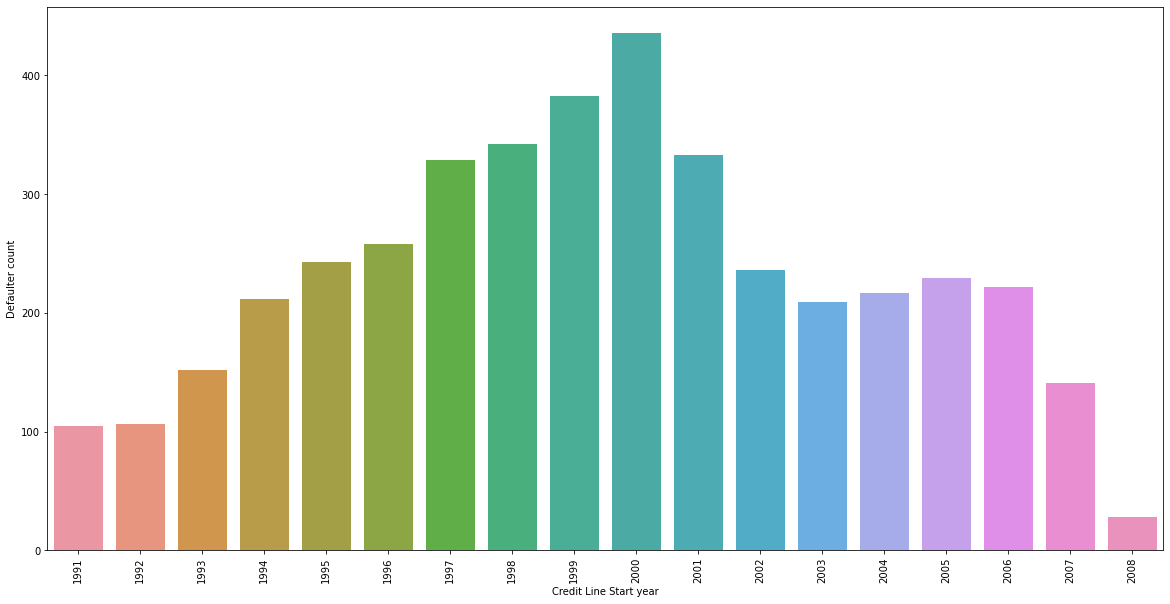

In [383]:
fig = plt.figure(figsize = (20,10))
sns.countplot(data = df_set1[(df_set1.loan_status == 'Charged Off') & (df_set1.earl_crline_year > 1990)], x = 'earl_crline_year')
plt.xlabel('Credit Line Start year')
plt.ylabel('Defaulter count')
plt.xticks(rotation = 90)
plt.show()

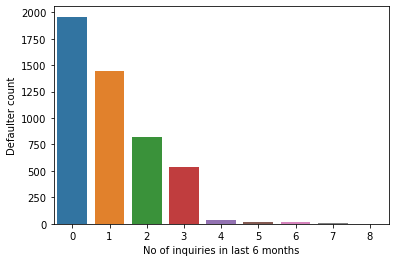

In [388]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'inq_last_6mths')
plt.xlabel('No of inquiries in last 6 months')
plt.ylabel('Defaulter count')
plt.show()

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

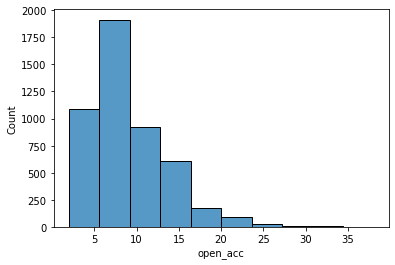

In [392]:
sns.histplot(df_set1[df_set1.loan_status == 'Charged Off']['open_acc'],bins = 10)

Borrowers having open account between 5-10 have higher chances of being the defaulter

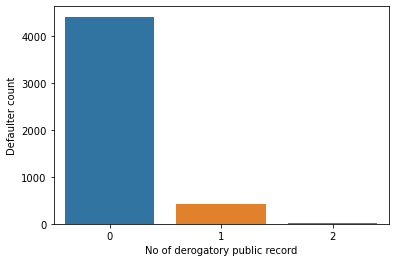

In [397]:
sns.countplot(data = df_set1[df_set1.loan_status == 'Charged Off'], x = 'pub_rec')
plt.xlabel('No of derogatory public record')
plt.ylabel('Defaulter count')
plt.show()

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

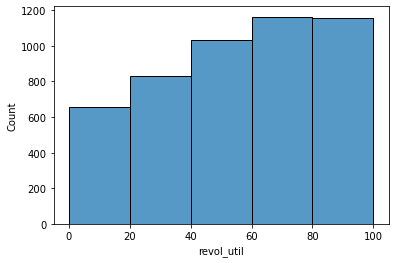

In [402]:
sns.histplot(df_set1[df_set1.loan_status == 'Charged Off']['revol_util'],bins = 5)

Borrowers who are using credit utilization more than 60% have higher chances of being loan defaulter

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

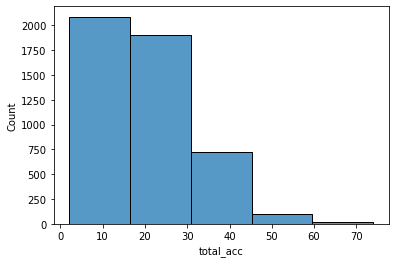

In [410]:
sns.histplot(df_set1[df_set1.loan_status == 'Charged Off']['total_acc'],bins = 5)

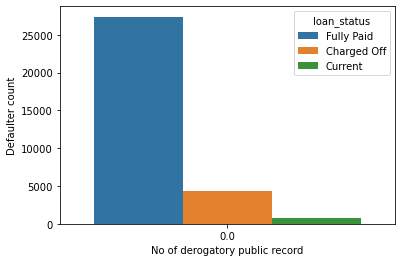

In [423]:
sns.countplot(data = df_set1[df_set1.pub_rec_bankruptcies == 0], x = 'pub_rec_bankruptcies',hue = 'loan_status')
plt.xlabel('No of derogatory public record')
plt.ylabel('Defaulter count')
plt.show()

In [427]:
df_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34792 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 34792 non-null  int64   
 1   funded_amnt_inv           34792 non-null  int64   
 2   term                      34792 non-null  int64   
 3   int_rate                  34792 non-null  int64   
 4   installment               34792 non-null  int64   
 5   grade                     34792 non-null  object  
 6   sub_grade                 34792 non-null  object  
 7   emp_length                34792 non-null  int64   
 8   home_ownership            34792 non-null  object  
 9   annual_inc                34792 non-null  int64   
 10  verification_status       34792 non-null  object  
 11  issue_d                   34792 non-null  object  
 12  loan_status               34792 non-null  object  
 13  purpose                   34792 non-null  obje